# 1.3 Steady-state 1D adiabatic fixed bed reactor model with irreversible first order exothermic reaction: A -> B + C

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

param = {"vel": 2.0, "length": 0.5, "T_in": 293, "T_ref": 293, "pres": 101325, "xA_in":1.0, "xB_in": 0.0, "xC_in": 0.0,
         "k10": 1.0e9, "Eact": 50e3, "Rgas": 8.314, "DHr": -15e3, "CpA": 100, "CpB": 60, "CpC": 40}

## b) Constant gas velocity case 

Final concentration: t = 0.5, c = [-3.09251892e-14  4.15947934e+01  4.15947934e+01  4.43000000e+02]


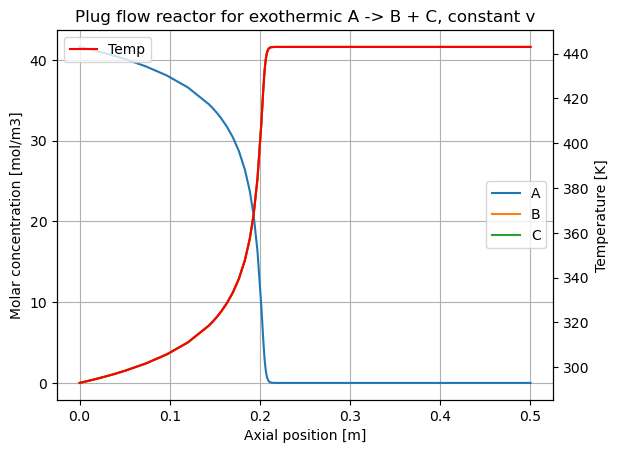

In [22]:
def source_constant_v(z, u, **param):
    Temp = u[-1]    
    k = param["k10"]*np.exp(-param["Eact"]/(param["Rgas"]*Temp))
    r = k*u[0]
    s = np.zeros_like(u)
    s[0] = -r
    s[1] = r
    s[2] = r
    ctotCp = u[0]*param["CpA"] + u[1]*param["CpB"] + u[2]*param["CpC"]
    dCp = s[0]*param["CpA"] + s[1]*param["CpB"] + s[2]*param["CpC"]
    s[3] = (r*-param["DHr"] - dCp*(Temp-param["T_ref"]))/ctotCp
    return s

z_span = [0, param["length"]]
ctot = param["pres"]/(param["Rgas"]*param["T_in"])
u0 = [param["xA_in"]*ctot, param["xB_in"]*ctot, param["xC_in"]*ctot, param["T_in"]]
sol = solve_ivp(lambda z, u: (source_constant_v(z, u, **param)/param["vel"]), z_span, u0, method='LSODA')
print(f"Final concentration: t = {sol.t[-1]}, c = {sol.y[:,-1]}")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(3):
    ax1.plot(sol.t, sol.y[i], label=chr(ord('A') + i))
ax2.plot(sol.t, sol.y[3], label='Temp', color='r')
plt.title('Plug flow reactor for exothermic A -> B + C, constant v')
ax1.set_xlabel('Axial position [m]')
ax1.set_ylabel('Molar concentration [mol/m3]')
ax2.set_ylabel('Temperature [K]')
ax1.legend()
ax2.legend()
ax1.grid()
plt.show()

Final solution: t = 0.5, u = [-1.70808150e-10  8.31895869e+01  8.31895869e+01  4.43000000e+02]


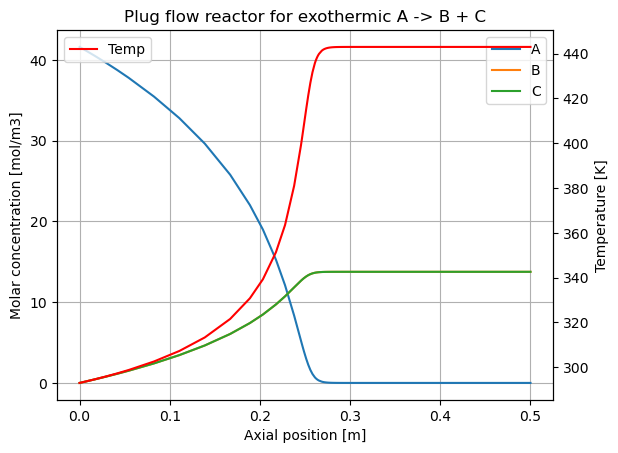

In [26]:
def source(z, u, **param):
    Temp = u[3]
    Ftot = u[0] + u[1] + u[2]
    ctot = param["pres"]/(param["Rgas"]*Temp)
    cA = u[0]*(ctot/Ftot)
        
    k = param["k10"]*np.exp(-param["Eact"]/(param["Rgas"]*Temp))
    r = k*cA
    
    s = np.zeros_like(u)
    s[0] = -r
    s[1] = r
    s[2] = r
    FtotCp = u[0]*param["CpA"] + u[1]*param["CpB"] + u[2]*param["CpC"]
    dCp = s[0]*param["CpA"] + s[1]*param["CpB"] + s[2]*param["CpC"]
    s[3] = (r*-param["DHr"]-dCp*(Temp-param["T_ref"]))/FtotCp
    return s

z_span = [0, param["length"]]
ctot = param["pres"]/(param["Rgas"]*param["T_in"])
u0 = [ctot*param["xA_in"]*param["vel"], ctot*param["xB_in"]*param["vel"], ctot*param["xC_in"]*param["vel"], param["T_in"]]
sol = solve_ivp(lambda z, u: source(z, u, **param), z_span, u0, method='LSODA')
print(f"Final solution: t = {sol.t[-1]}, u = {sol.y[:,-1]}")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(3):
    ax1.plot(sol.t, sol.y[i]*param["pres"]/(param["Rgas"]*sol.y[3])/(sol.y[0]+sol.y[1]+sol.y[2]), label=chr(ord('A') + i))
ax2.plot(sol.t, sol.y[3], label='Temp', color='r')
plt.title('Plug flow reactor for exothermic A -> B + C')
ax1.set_xlabel('Axial position [m]')
ax1.set_ylabel('Molar concentration [mol/m3]')
ax2.set_ylabel('Temperature [K]')
ax1.legend()
ax2.legend()
ax1.grid()
plt.show()